In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras

import scipy.io
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

In [2]:
# Storing the output
le = LabelEncoder()
data = pd.read_csv('training2017/REFERENCE.csv', header=None, names=['name', 'label'])
y = le.fit_transform(data.label.values)
y = y.reshape(-1, 1)

In [3]:
# Get the number of unique labels
num_labels = len(le.classes_)

# Print the labels encoding
print('Labels encoding:')
for i in range(num_labels):
    print(i, le.inverse_transform([i])[0])

Labels encoding:
0 A
1 N
2 O
3 ~


In [4]:
# Storing the input
def get_data(file):
    data = scipy.io.loadmat(file)['val'][0]
    return data.astype(float)

data_list = [get_data('training2017/{}.mat'.format(i)) for i in data.name.values]

X = np.array(data_list, dtype=object)

In [5]:
dt = 1/300
print('The timestep is: ', dt)

The timestep is:  0.0033333333333333335


The ECG were sampled as 300 Hz.
This means every datapoint represent an increment in time of $\frac{1}{300Hz}=0.0033333333333333335s$

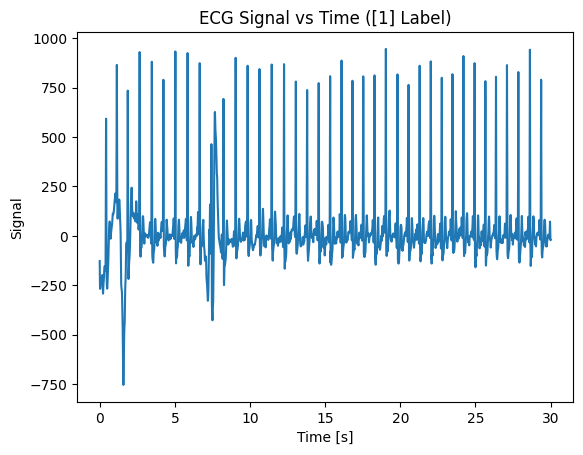

In [6]:
idx = 0

plt.plot(dt*np.arange(len(X[idx])),X[idx])
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title(f'ECG Signal vs Time ({y[idx]} Label)')
plt.show()